Visualize Social Graph

In [1]:
edges = [
    ("user_1", "user_2"),
    ("user_1", "user_3"),
    ("user_2", "user_4"),
    ("user_3", "user_5"),
    ("user_4", "user_5"),
]

In [2]:
import networkx as nx

# Create graph
G = nx.Graph()

# Add edges
G.add_edges_from(edges)

print("Nodes:", G.nodes())
print("Edges:", G.edges())


Nodes: ['user_1', 'user_2', 'user_3', 'user_4', 'user_5']
Edges: [('user_1', 'user_2'), ('user_1', 'user_3'), ('user_2', 'user_4'), ('user_3', 'user_5'), ('user_4', 'user_5')]


In [3]:
# Degree (how many connections each user has)
degree_dict = dict(G.degree())
print("Degree:", degree_dict)


Degree: {'user_1': 2, 'user_2': 2, 'user_3': 2, 'user_4': 2, 'user_5': 2}


In [4]:
# Clustering coefficient (how tightly-knit user’s neighborhood is)
clustering = nx.clustering(G)
print("Clustering:", clustering)

Clustering: {'user_1': 0, 'user_2': 0, 'user_3': 0, 'user_4': 0, 'user_5': 0}


In [5]:
# Connected components (communities)
components = list(nx.connected_components(G))
print("Communities:", components)


Communities: [{'user_2', 'user_1', 'user_4', 'user_3', 'user_5'}]


In [6]:
# Centrality (influencers)
centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", centrality)


Betweenness Centrality: {'user_1': 0.16666666666666666, 'user_2': 0.16666666666666666, 'user_3': 0.16666666666666666, 'user_4': 0.16666666666666666, 'user_5': 0.16666666666666666}


In [7]:
# Compute “Friend-of-Friend” Recommendations
from collections import Counter

def recommend_friends(G, user):
    if user not in G:
        return []

    direct = set(G.neighbors(user))
    fof = Counter()

    # Count friends-of-friends that are not direct connections
    for friend in direct:
        for candidate in G.neighbors(friend):
            if candidate != user and candidate not in direct:
                fof[candidate] += 1

    # Sort by number of mutual connections
    return fof.most_common()

print("Recommendations for user_1:")
print(recommend_friends(G, "user_1"))


Recommendations for user_1:
[('user_5', 1), ('user_4', 1)]


In [8]:
# weighted social graph by interactions, messages, likes
weighted_edges = [
    ("user_1", "user_2", 12),  # 12 interactions
    ("user_1", "user_3", 4),
    ("user_2", "user_4", 7),
]


In [9]:
# build weighted graph
G_weighted = nx.Graph()

for u, v, w in weighted_edges:
    G_weighted.add_edge(u, v, weight=w)

print(G_weighted.edges(data=True))


[('user_1', 'user_2', {'weight': 12}), ('user_1', 'user_3', {'weight': 4}), ('user_2', 'user_4', {'weight': 7})]


In [10]:
# strong connections
sorted_edges = sorted(G_weighted.edges(data=True), key=lambda x: x[2]["weight"], reverse=True)
print("Strongest ties:", sorted_edges[:5])


Strongest ties: [('user_1', 'user_2', {'weight': 12}), ('user_2', 'user_4', {'weight': 7}), ('user_1', 'user_3', {'weight': 4})]


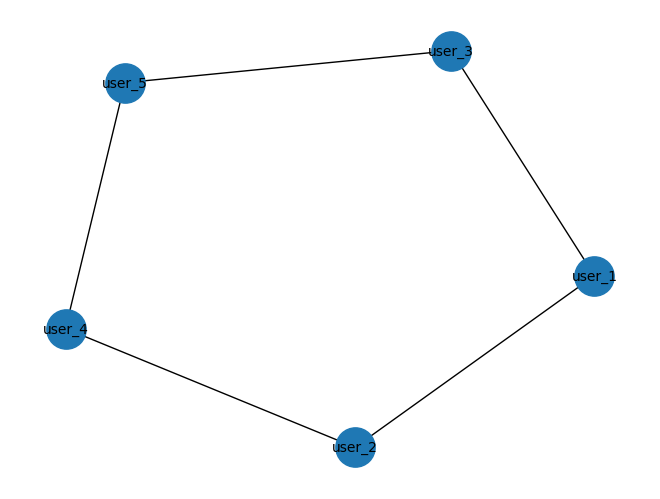

In [11]:
# visualize the graph
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)   # force-directed layout
nx.draw(G, pos, with_labels=True, node_size=800, font_size=10)
plt.show()


Mock data with influencer and varying friends

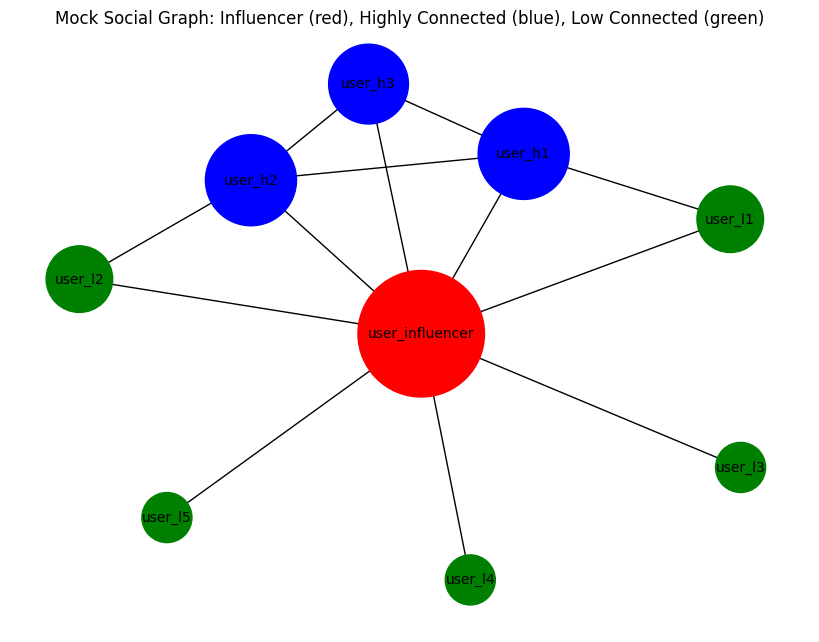

Degrees (number of friends):
user_influencer: 8
user_h1: 4
user_h2: 4
user_h3: 3
user_l1: 2
user_l2: 2
user_l3: 1
user_l4: 1
user_l5: 1


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Define nodes
influencer = "user_influencer"

# Highly connected users (connected to several others)
highly_connected_users = ["user_h1", "user_h2", "user_h3"]

# Low-connectivity users
low_connected_users = ["user_l1", "user_l2", "user_l3", "user_l4", "user_l5"]

# Add edges
# Influencer connects to everyone
for user in highly_connected_users + low_connected_users:
    G.add_edge(influencer, user)

# High-connectivity users connect among themselves and a few low-connected users
G.add_edge("user_h1", "user_h2")
G.add_edge("user_h1", "user_h3")
G.add_edge("user_h2", "user_h3")
G.add_edge("user_h1", "user_l1")
G.add_edge("user_h2", "user_l2")

# Low-connected users mostly just connected to influencer
# user_l3, user_l4, user_l5 only connect to influencer (already added above)

# Visualize
pos = nx.spring_layout(G, seed=42)  # consistent layout
plt.figure(figsize=(8,6))

# Node sizes based on degree (more friends → bigger node)
node_sizes = [300 + 1000*G.degree(n) for n in G.nodes()]

# Node colors: influencer = red, highly connected = blue, low-connected = green
node_colors = []
for n in G.nodes():
    if n == influencer:
        node_colors.append('red')
    elif n in highly_connected_users:
        node_colors.append('blue')
    else:
        node_colors.append('green')

nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=10)
plt.title("Mock Social Graph: Influencer (red), Highly Connected (blue), Low Connected (green)")
plt.show()

# Print degrees for clarity
print("Degrees (number of friends):")
for node, deg in G.degree():
    print(f"{node}: {deg}")
